In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import os
import requests
import shutil
import xarray as xr

In [2]:
def download_and_load_goldcopy(url):
    filename = os.path.basename(url)
    if os.path.isfile(filename):
        ds = xr.open_dataset(filename)
        return ds
    else:
        with requests.get(url, stream = True) as req:
            with open(filename, 'wb') as fileobj:
                shutil.copyfileobj(req.raw, fileobj)
        if os.path.isfile(filename):
            ds = xr.open_dataset(filename)
            return ds
        else:
            return FileNotFoundError

## Verify Links Represent The Same Data

In [3]:
opendap_url = "http://thredds.dataexplorer.oceanobservatories.org/thredds/dodsC/ooigoldcopy/public/CE02SHSP-SP001-04-OPTAAJ000-recovered_cspp-optaa_dj_cspp_instrument_recovered/deployment0013_CE02SHSP-SP001-04-OPTAAJ000-recovered_cspp-optaa_dj_cspp_instrument_recovered_20190624T165543.774000-20190627T023924.583000.nc"

file_url = "https://thredds.dataexplorer.oceanobservatories.org/thredds/fileServer/ooigoldcopy/public/CE02SHSP-SP001-04-OPTAAJ000-recovered_cspp-optaa_dj_cspp_instrument_recovered/deployment0013_CE02SHSP-SP001-04-OPTAAJ000-recovered_cspp-optaa_dj_cspp_instrument_recovered_20190624T165543.774000-20190627T023924.583000.nc" 

In [4]:
os.path.basename(opendap_url) == os.path.basename(file_url)

True

## Load OpenDAP Dataset

In [5]:
odnc = xr.open_dataset(opendap_url + '#fillmismatch')

In [6]:
odnc

<xarray.Dataset> Size: 400MB
Dimensions:                       (obs: 131979, wavelength: 86)
Coordinates:
  * obs                           (obs) int32 528kB 0 1 2 ... 131977 131978
    lat                           (obs) float64 1MB ...
  * wavelength                    (wavelength) int32 344B 0 1 2 3 ... 83 84 85
    lon                           (obs) float64 1MB ...
    depth                         (obs) float64 1MB ...
    time                          (obs) datetime64[ns] 1MB ...
Data variables: (12/30)
    external_temp_raw             (obs) float32 528kB ...
    deployment                    (obs) int32 528kB ...
    int_ctd_pressure              (obs) float64 1MB ...
    driver_timestamp              (obs) datetime64[ns] 1MB ...
    id                            (obs) |S64 8MB ...
    wavelength_a                  (wavelength) float64 688B ...
    ...                            ...
    c_signal_counts               (obs, wavelength) float32 45MB ...
    a_signal_counts               (obs, wavelength) float32 45MB ...
    a_reference_counts            (obs, wavelength) float32 45MB ...
    beam_attenuation              (obs, wavelength) float64 91MB ...
    optical_absorption            (obs, wavelength) float64 91MB ...
    c_reference_counts            (obs, wavelength) float32 45MB ...
Attributes: (12/71)
    node:                               SP001
    comment:                            
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  recovered_cspp
    stream:                             optaa_dj_cspp_instrument_recovered
    ...                                 ...
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down
    DODS.strlen:                        18
    DODS.dimName:                       string18
    DODS_EXTRA.Unlimited_Dimension:     obs

## Load File Dataset

In [7]:
fnc = download_and_load_goldcopy(file_url + '#fillmismatch')

In [8]:
fnc

<xarray.Dataset> Size: 393MB
Dimensions:                       (obs: 131979, wavelength: 86)
Coordinates:
  * obs                           (obs) int32 528kB 0 1 2 ... 131977 131978
    lat                           (obs) float64 1MB ...
  * wavelength                    (wavelength) int32 344B 0 1 2 3 ... 83 84 85
    lon                           (obs) float64 1MB ...
    depth                         (obs) float64 1MB ...
    time                          (obs) datetime64[ns] 1MB ...
Data variables: (12/30)
    external_temp_raw             (obs) float32 528kB ...
    c_signal_counts               (obs, wavelength) float32 45MB ...
    deployment                    (obs) int32 528kB ...
    a_signal_counts               (obs, wavelength) float32 45MB ...
    int_ctd_pressure              (obs) float64 1MB ...
    a_reference_counts            (obs, wavelength) float32 45MB ...
    ...                            ...
    preferred_timestamp           (obs) object 1MB ...
    a_signal_dark_counts          (obs) float32 528kB ...
    c_reference_counts            (obs, wavelength) float32 45MB ...
    a_reference_dark_counts       (obs) float32 528kB ...
    suspect_timestamp             (obs) float32 528kB ...
    sea_water_temperature         (obs) float64 1MB ...
Attributes: (12/68)
    node:                               SP001
    comment:                            
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  recovered_cspp
    stream:                             optaa_dj_cspp_instrument_recovered
    ...                                 ...
    geospatial_lon_max:                 -123.69743
    geospatial_lon_units:               degrees_east
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down

## Verify Each Dataset Contains The Same Variables and Dimensions

In [9]:
sorted(list(odnc.data_vars)) == sorted(list(fnc.data_vars))

True

In [10]:
sorted(list(odnc.dims)) == sorted(list(fnc.dims))

True

## Compare Variables

In [11]:
print('Same Variables and Dimensions in Each Dataset Match?\n')
print(f"{'time'}: {bool(np.all(odnc['time'] == fnc['time']))}")

data_dims = odnc.dims
for dd in data_dims:
    print(f"{str(dd)}: {bool(np.all(odnc[dd] == fnc[dd]))}")
    
data_variables = odnc.data_vars
for dv in data_variables:
    print(f"{str(dv)}: {bool(np.all(odnc[dv] == fnc[dv]))}")
    

Same Variables and Dimensions in Each Dataset Match?

time: True
obs: True
wavelength: True
external_temp_raw: False
deployment: True
int_ctd_pressure: True
driver_timestamp: True
id: True
wavelength_a: True
provenance: True
wavelength_c: True
internal_timestamp: True
profiler_timestamp: True
internal_temp_raw: False
ingestion_timestamp: True
c_reference_dark_counts: True
port_timestamp: True
num_wavelengths: True
sea_water_practical_salinity: True
on_seconds: True
c_signal_dark_counts: True
pressure_counts: True
preferred_timestamp: True
a_signal_dark_counts: True
a_reference_dark_counts: True
suspect_timestamp: True
sea_water_temperature: True
c_signal_counts: False
a_signal_counts: False
a_reference_counts: False
beam_attenuation: False
optical_absorption: False
c_reference_counts: False


In [12]:
comp_wvl_idx = 50
sub_odnc = odnc.sel(wavelength = comp_wvl_idx)
sub_fnc = fnc.sel(wavelength = comp_wvl_idx)

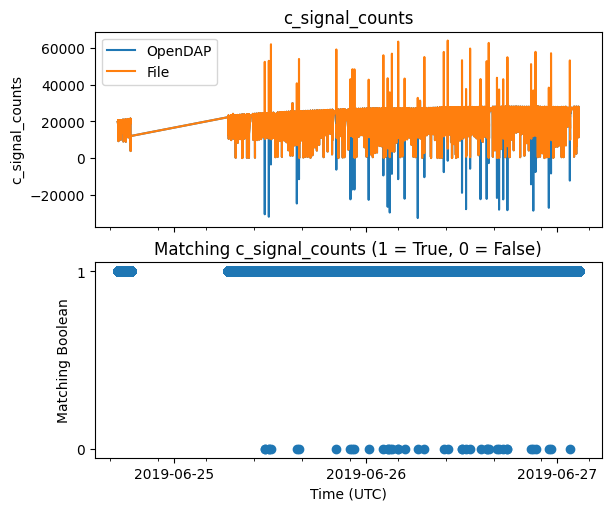

In [13]:
fig, ax = plt.subplots(2, 1, figsize = (6, 5), constrained_layout = True, sharex = True)
ax[0].plot(sub_odnc.time, sub_odnc.c_signal_counts, label = 'OpenDAP')
ax[0].plot(sub_fnc.time, sub_fnc.c_signal_counts, label = 'File')
ax[0].legend(loc = 'upper left')
ax[0].set_title('c_signal_counts')

matching = sub_fnc.c_signal_counts == sub_odnc.c_signal_counts
ax[1].scatter(sub_fnc.time, matching, marker = 'o')
ax[1].set_title('Matching c_signal_counts (1 = True, 0 = False)')

ax[-1].xaxis.set_major_locator(mdates.DayLocator(interval = 1))
ax[-1].xaxis.set_minor_locator(mdates.HourLocator(interval = 6))
ax[-1].set_xlabel('Time (UTC)')

ax[0].set_ylabel('c_signal_counts')
ax[1].set_ylabel('Matching Boolean')
ax[1].yaxis.set_major_locator(mticker.MultipleLocator(1))